# The graphical interface

To give a better understading of the k-means algorithm I create an interactive interface which represent each clusters by one color, show the mean of the cluster and show to the 'center' of the cluster. The centers represent the set of points $c_i \; \forall i\in\{1,...,n\}$ from which we compute the current clusters. The mean of the cluster represent where the next $c_{i+1}$ will be located. 

To better understand how to centers are computed, we add a voronoï diagram of the centers. Each faces of the voronoï diagram represent a set where all the points inside it belongs to the same cluster. 

## Compute the Voronoi graph

### How to draw the voronoi lines

To better understand where the points will be separated between clusters, we do a Voronoi diagram of the centers. To do this we use the scipy function Voronoi diagram: scipy.spatial.Voronoi but this function is not easy to use because it will return a class which for each segment of the voronoi diagram gives the two points of the voronoi diagram that delimit the segment and the 2 centers that was used to compute it. But there is a case where the segment is a ray, let's call it $R$, that goes to the infinity and we have one point of the voronoi diagram. 

Let $c_1$ and $c_2$ be the 2 centers mentionned before. To compute the ray, we need to understand that it is included inside the line $L$ where $x\in L \iff d(c_1,x)=d(c_2,x)$. We see that the perdendicular of the vector $c_2 - c_1$ and passing by the middle of the two points $(c_1+c_2)/2$ correspond to this line. 

Now the difficult part is to find the direction of the line. To do this we need to understand that there should be no centers in the half-plan delimited by the line passing by $c_2$ and $c_1$ and in the direction such that it insect $R$ at the infinity. Indeed if there is a center $c$ that is stricly inside this plan, we define $c_p$ the point that is the nearest of $c$. We will draw the line where the points are at equal distance between $c$ and $c_p$. This line must intersect the ray a some point. $\color{red}{Explain\;Further\; why\;it\;must}$ and if continue in the direction of the ray, the point will be stricly closer to $c$ that $c_p$ and we arrive at a contradiction. The graph below show an example to illustrate this point. 

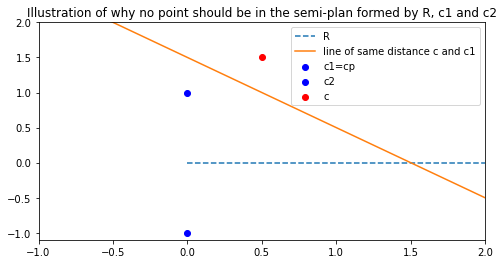

In practice to see if the first perpendicular direction that we compute is good we check for each center $c$ if the angle between the ray vector $r$ and $c-m$ is larger than 90° as show in the pseudo-code below: 

    r = perpendicular(c_1,c_2)
    m = (c_1+c_2)/2
    for c in centers: 
        if( dot_product(c-m,r) > 1e-10 ):
            dir_lin *= -1
            break
                 
                 
Now we need to see where is the limit of our line. Before explaining the topic, let's explain how matplotlib work to draw a segment in 2D. It is a function that takes two set points, one for the x axis($X$) and another for the y axis($Y$) and plot each tuple in 2D space containing the $i^e$ of X and Y and rely them with a segment. 

We want to plot the line inside the square defined by $[x\_lim[0],x\_lim[1]]\; \times \; [y\_lim[0],y\_lim[1]]$. To do this we need to find the intersection of the ray with the cube. To do this compute the intersections points of the ray with the cube segment by segment in 2 step where each segment contain 2 corners of the cube.

step 1: We check if the ray touches the segment of cube with the code that we have seen in the tps. 
step 2: We compute mathematically the formula of the intersection between 2 lines. 

If the point is inside the square(checked with the technique seen in the tps) we have the limit point of our ray which is where an intersection with a segment happend.

If the point is outside the square. If we find 2 differents points of intersections we draw the line. Otherwise we do nothing because the line doesn't go inside the square. 



## The definition of the colorpalette

To have a nice graphical representation, we need to have a good colorpalette representing the differents clusters

To do that 2 ideas where tested: 

The first one consist to divide the light's spectrum in a serie of point at equal distance between each other: 

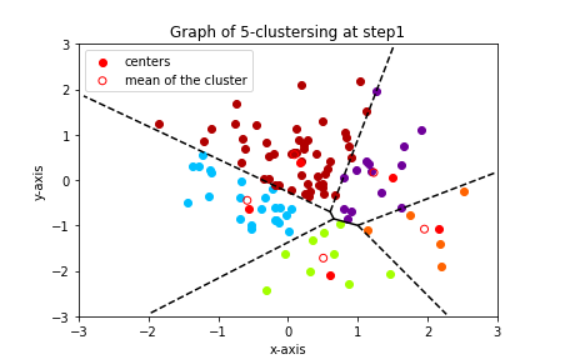

When we have lot's of clusters the colors are beginning to ressemble to each others.

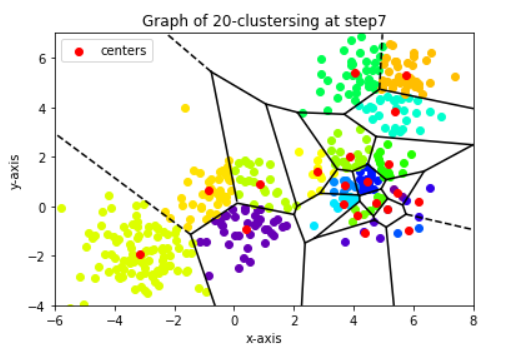

The other solution in to use seaborn color system which optimize the hue to better distinguish the points. According to https://www.merriam-webster.com/dictionary/hue, the hue is "the attribute of colors that permits them to be classed as red, yellow, green, blue, or an intermediate between any contiguous pair of these colors". 

To implement it we use the sns library. 

Below you can see the application of the new color-palette on the dataset. In the second graph there is still color that resemble together but it seems better than the previous ones. 

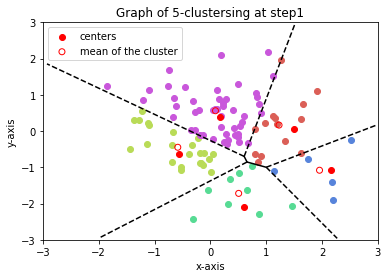

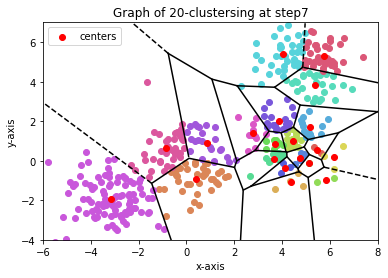